In [35]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [50]:
import numpy as np
import pandas as pd
x,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,
                       n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=10)

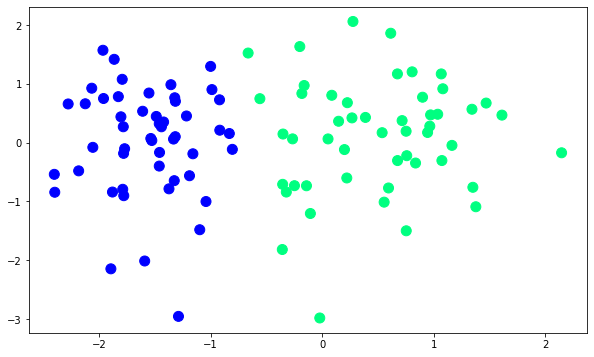

In [51]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)

In [76]:
def perceptron(x,y):
    x=np.insert(x,0,1,axis=1)
    weights=np.ones(x.shape[1])
    lr=0.1
    
    for i in range(10000):
        for j in range(x.shape[0]):
            j=np.random.randint(0,100)
            y_hat=step(np.dot(x[j],weights))
            weights=weights+ lr*(y[j]-y_hat)*x[j]
    return weights[0],weights[1:]
        

In [77]:
def step(z):
    return 1 if z>0 else 0

In [78]:
intercept,coef_=perceptron(x,y)
print(intercept,coef_)

1.0 [1.33479256 0.06026278]


In [79]:
m=-(coef_[0]/coef_[1])
b=intercept
x_input=np.linspace(-3,3,100)
y_input=m*x_input+b

<IPython.core.display.Javascript object>


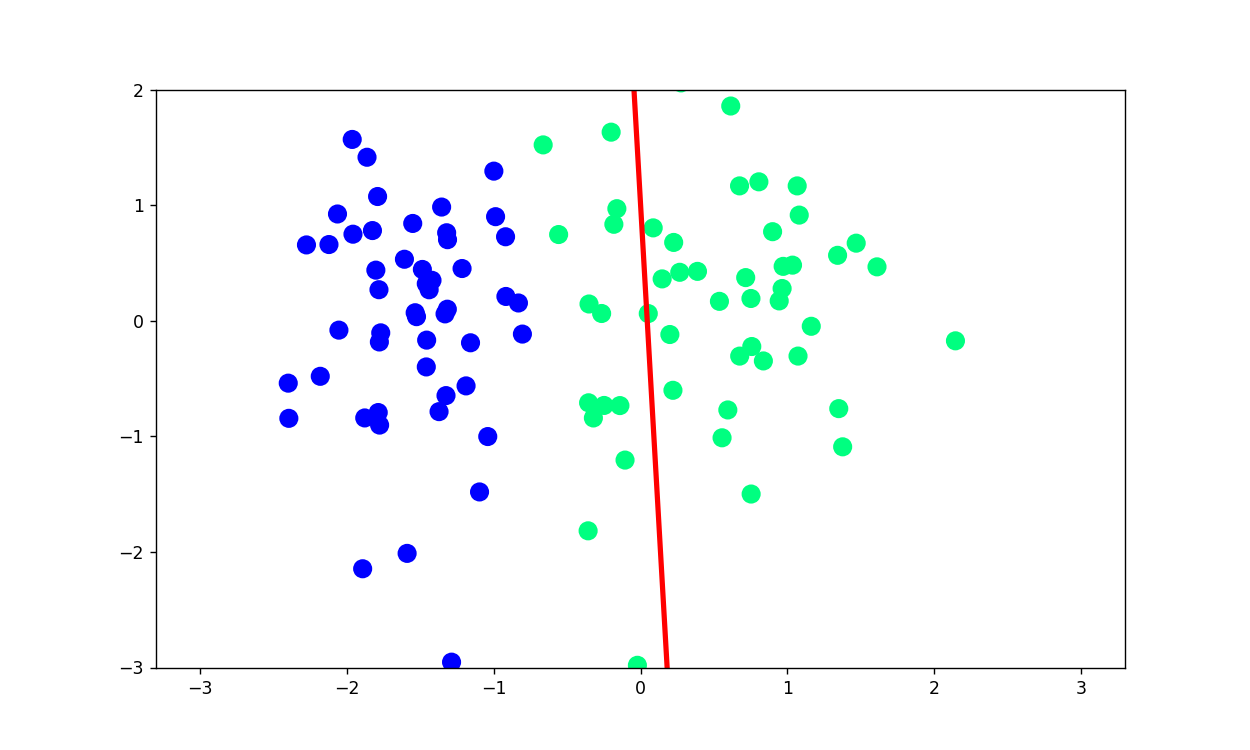

(-3.0, 2.0)

In [80]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [71]:
def perceptron(x,y):
    m=[]
    b=[]
    x=np.insert(x,0,1,axis=1)
    weights=np.ones(x.shape[1])
    lr=0.1
    
    for i in range(1000):
        for j in range(x.shape[0]):
            y_hat=step(np.dot(x[j],weights))
            weights=weights+lr*(y[j]-y_hat)*x[j]
        
            m.append(-(weights[1]/weights[2]))
            b.append(-(weights[0]/weights[2]))
    return m,b 

In [72]:
m,b=perceptron(x,y)

In [73]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


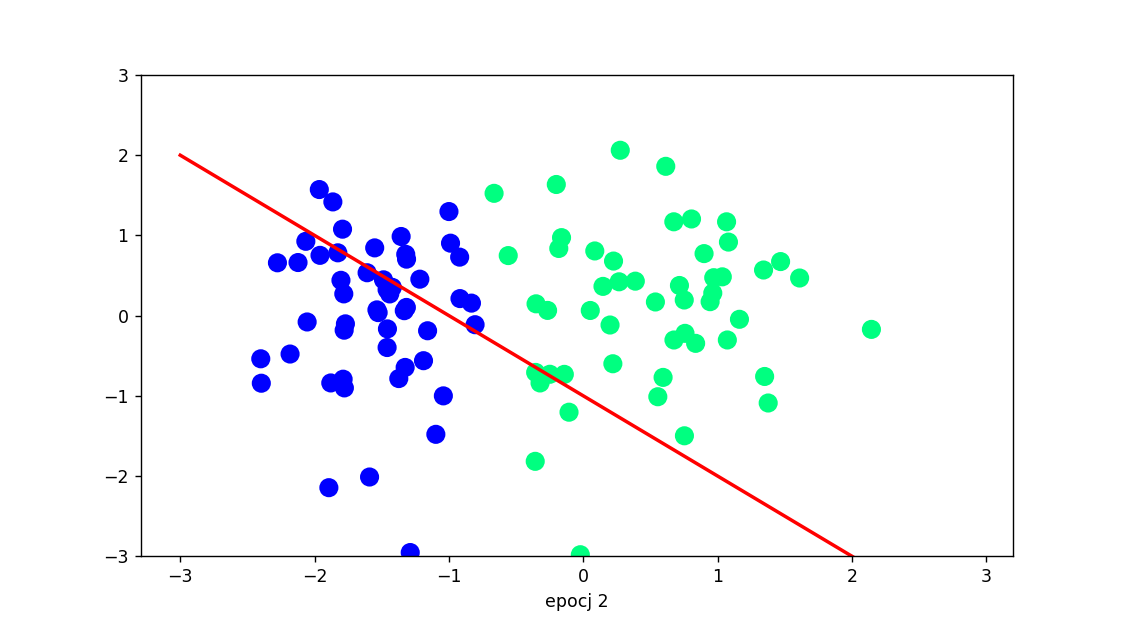

In [74]:
fig,ax=plt.subplots(figsize=(9,5))
x_i=np.arange(-3,3,0.1)
y_i=x_i*m[0]+b[0]
ax.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
line,=ax.plot(x_i,x_i*m[0]+b[0],'r-',linewidth=2)
plt.ylim(-3,3)

def update(i):
    label='epocj {0}'.format(i+1)
    line.set_ydata(x_i*m[i]+b[i])
    ax.set_xlabel(label)
anim=FuncAnimation(fig,update,repeat=True,frames=200,interval=100)

In [64]:
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression()
lor.fit(x,y)

LogisticRegression()

In [66]:
m=-(lor.coef_[0][0]/lor.coef_[0][1])
b=-(lor.intercept_/lor.coef_[0][1])

In [67]:
x_input1=np.linspace(-3,3,100)
y_input1=m*x_input1+b

<IPython.core.display.Javascript object>


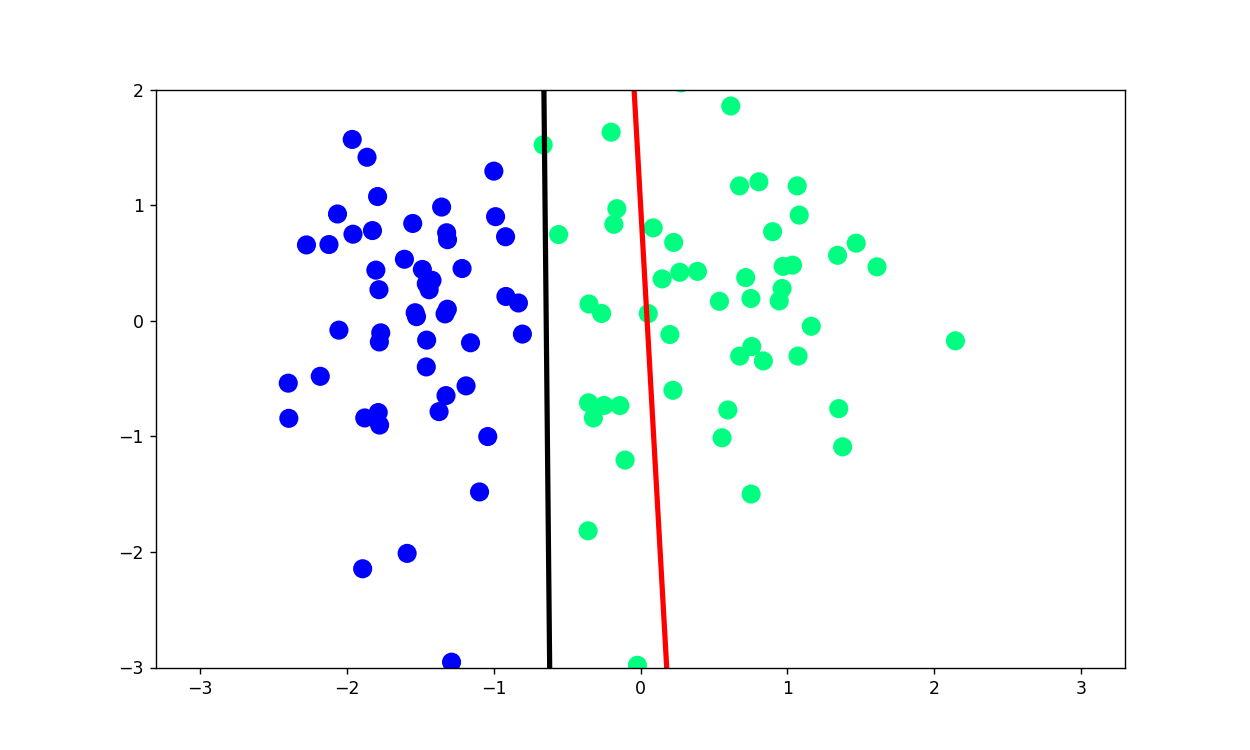

(-3.0, 2.0)

In [70]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)